* [3.1 Preprocessing](#3.1-Preprocessing)
    * [3.1.1 Tokenize](#3.1.1-Tokenize)
    * [3.1.2 Lemmatize](#3.1.2-Lemmatize)
    * [3.1.3 Stem](#3.1.3-Stem)    
    
* [3.2 Baseline Model](#3.2-Baseline-Model)
    * [3.2.1 Count Vectorizer](#3.2.1-Count-Vectorizer)
    * [3.2.2 Naive Bayes](#3.2.2-Naive-Bayes)
        * [3.2.2.1 Tokenized words](#3.2.2.1-Tokenized-words)
        * [3.2.2.2 Lemmatized words](#3.2.2.2-Lemmatized-words)
        * [3.2.2.3 Stemmed words](#3.2.2.3-Stemmed-words)
    * [3.2.3 Stopwords](#3.2.3-Stopwords)
    * [3.2.4 Naive Bayes 2](#3.2.4-Naive-Bayes-2)    

* [3.3 Model Tuning](#3.3-Model-Tuning)
    * [3.3.1 Naive Bayes with TF-IDF](#3.3.1-Naive-Bayes-with-TF-IDF)
    * [3.3.2 Random Forest](#3.3.2-Random-Forest)    

* [3.4 Conclusion and Recommendation](#3.4-Conclusion-and-Recommendation)

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, precision_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
reddit = pd.read_csv('../datasets/nike_adidas.csv')

# 3.1 Preprocessing

## 3.1.1 Tokenize

In [3]:
tokenizer = RegexpTokenizer('\s+', gaps=True)

In [4]:
text_tokens = [tokenizer.tokenize(text.lower()) for text in (reddit['text'])]

In [5]:
reddit['text_tokens'] = pd.DataFrame(data=[text_tokens], index=['text_tokens']).T[['text_tokens']]

In [6]:
reddit['text_tokens'] = reddit['text_tokens'].apply(lambda row: ' '.join(row))
reddit

,subreddit,text,text_tokens
0,1,nike snkrs paypal error Im trying to login wit...,nike snkrs paypal error im trying to login wit...
1,1,Our local courier here in the Philippines lost...,our local courier here in the philippines lost...
2,1,What jacket is this? I know this is vintage an...,what jacket is this? i know this is vintage an...
3,1,Burned on the dunk drop today. So I’m just get...,burned on the dunk drop today. so i’m just get...
4,1,Is there anyway to restore the grip on a pair ...,is there anyway to restore the grip on a pair ...
...,...,...,...
9995,0,Ultraboost 22 vs 4DFWD2? Just what the title s...,ultraboost 22 vs 4dfwd2? just what the title s...
9996,0,No order confirmation So yesterday I won the y...,no order confirmation so yesterday i won the y...
9997,0,Im thinking about buying the firebird primeblu...,im thinking about buying the firebird primeblu...
9998,0,Adidas 4DFWD Long term review needed I’m think...,adidas 4dfwd long term review needed i’m think...


## 3.1.2 Lemmatize

In [7]:
lemmatizer = WordNetLemmatizer()

In [8]:
lems = []
for post in text_tokens:
    tok_post = []
    for word in post:
        tok_post.append(lemmatizer.lemmatize(word))
    posts = " ".join(tok_post)
    lems.append(posts)

In [9]:
reddit['text_lem'] = lems

## 3.1.3 Stem

In [10]:
p_stemmer = PorterStemmer()

In [11]:
stem = []
for post in text_tokens:
    tok_post = []
    for word in post:
        tok_post.append(p_stemmer.stem(word))
    posts = " ".join(tok_post)
    stem.append(posts)

# 3.2 Baseline Model

In [45]:
X = reddit['text_tokens']
X2 = reddit['text_lem']
X3 = reddit['text_stem']
y = reddit['subreddit']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.33, stratify=y, random_state=42)

In [48]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.33, stratify=y, random_state=42)

## 3.2.1 Count Vectorizer

In [49]:
cvec = CountVectorizer(stop_words = 'english')

In [50]:
cvec.fit(X_train)
X_train_cvec = cvec.transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [57]:
X_train_cvec.shape

(6700, 1801)

In [52]:
cvec.fit(X2_train)
X2_train_cvec = cvec.transform(X2_train)
X2_test_cvec = cvec.transform(X2_test)

In [56]:
X2_train_cvec.shape

(6700, 1735)

In [54]:
cvec.fit(X3_train)
X3_train_cvec = cvec.transform(X3_train)
X3_test_cvec = cvec.transform(X3_test)

In [58]:
X3_train_cvec.shape

(6700, 1691)

## 3.2.2 Naive Bayes

### 3.2.2.1 Tokenized words

In [59]:
nb = MultinomialNB()

In [60]:
model = nb.fit(X_train_cvec, y_train)

In [61]:
predictions = model.predict(X_test_cvec)

In [62]:
model.score(X_train_cvec, y_train)

0.9971641791044776

In [63]:
model.score(X_test_cvec, y_test)

0.996969696969697

In [65]:
confusion_matrix(y_test, predictions)

array([[1645,    5],
       [   5, 1645]])

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [67]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 1645
False Positives: 5
False Negatives: 5
True Positives: 1645


### 3.2.2.2 Lemmatized words

In [77]:
model2 = nb.fit(X2_train_cvec, y2_train)

In [78]:
predictions2 = model2.predict(X2_test_cvec)

In [79]:
model2.score(X2_train_cvec, y2_train)

0.9983582089552239

In [80]:
model2.score(X2_test_cvec, y2_test)

0.996969696969697

In [99]:
confusion_matrix(y2_test, predictions2)

array([[1644,    6],
       [   4, 1646]])

In [82]:
tn2, fp2, fn2, tp2 = confusion_matrix(y2_test, predictions2).ravel()

In [83]:
print("True Negatives: %s" % tn2)
print("False Positives: %s" % fp2)
print("False Negatives: %s" % fn2)
print("True Positives: %s" % tp2)

True Negatives: 1644
False Positives: 6
False Negatives: 4
True Positives: 1646


### 3.2.2.3 Stemmed words

In [118]:
model3 = nb.fit(X3_train_cvec, y3_train)

In [119]:
predictions3 = model3.predict(X3_test_cvec)

In [120]:
model3.score(X3_train_cvec, y3_train)

0.9977611940298508

In [121]:
model3.score(X3_test_cvec, y3_test)

0.9972727272727273

In [122]:
confusion_matrix(y3_test, predictions3)

array([[1646,    4],
       [   5, 1645]])

In [123]:
tn3, fp3, fn3, tp3 = confusion_matrix(y3_test, predictions3).ravel()

In [124]:
print("True Negatives: %s" % tn3)
print("False Positives: %s" % fp3)
print("False Negatives: %s" % fn3)
print("True Positives: %s" % tp3)

True Negatives: 1646
False Positives: 4
False Negatives: 5
True Positives: 1645


#### Summary
|Model|Vectorizer|Words|Train Score|Test Score|False Positive|False Negative|
|----|----|----|----|----|----|----|
|Naive Bayes|Count|Tokenize|0.9972|0.9970|5|5|
|Naive Bayes|Count|Lemmatized|0.9984|0.9970|6|4|
|Naive Bayes|Count|Stemmed|0.9978|0.9973|4|5|

Our baseline model using Naive Bayes result in 99% of accurate prediction. The high score should result in each brand names are commonly found in their respective reddit, thus our model are not being properly train to identify other important words. Therefore, we will add brand names to the stopword. Stemmed word seems to have the least False Positive and False Negative. So we will use Stemmed for our baseline model.

## 3.2.3 Stopwords

In [104]:
stop_words = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_stopwords = ['nike','adidas']
new_stopwords_list = stop_words.union(new_stopwords)

In [166]:
stopwords_list = stopwords.words('english')

# From the EDA, I concluded that the following words were very common 
# in both /r/Jokes and /r/AntiJokes and were added noise. 
# I added these words to the nltk stop words
stopwords_list.extend(['nike','adidas'])


## 3.2.4 Naive Bayes 2

In [167]:
cvec2 = CountVectorizer(stop_words = stopwords_list)

In [168]:
cvec2.fit(X3_train)
X3_train_cvec2 = cvec2.transform(X3_train)
X3_test_cvec2 = cvec2.transform(X3_test)

In [169]:
X3_train_cvec2.shape

(6700, 1765)

In [170]:
model4 = nb.fit(X3_train_cvec2, y3_train)

In [171]:
predictions4 = model4.predict(X3_test_cvec2)

In [172]:
model4.score(X3_train_cvec2, y3_train)

0.9973134328358209

In [173]:
model4.score(X3_test_cvec2, y3_test)

0.9966666666666667

In [174]:
confusion_matrix(y3_test, predictions4)

array([[1646,    4],
       [   7, 1643]])

In [175]:
tn4, fp4, fn4, tp4 = confusion_matrix(y3_test, predictions4).ravel()

In [176]:
print("True Negatives: %s" % tn4)
print("False Positives: %s" % fp4)
print("False Negatives: %s" % fn4)
print("True Positives: %s" % tp4)

True Negatives: 1646
False Positives: 4
False Negatives: 7
True Positives: 1643


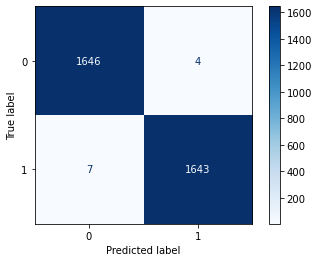

In [302]:
plot_confusion_matrix(model4, X3_test_cvec2, y3_test, cmap='Blues', values_format='d');

In [320]:
precision_score(y3_test, model4.predict(X3_test_cvec2))

0.9975713418336369

#### Final Baseline Model

|Model|Vectorizer|Words|Train Score|Test Score|False Positive|False Negative|
|----|----|----|----|----|----|----|
|Naive Bayes|Count|Stemmed|0.9978|0.9973|4|5|
|Naive Bayes|Count|Stemmed - Stopwords|0.9973|0.9967|4|7|

Seems like after adding 'nike' and 'adidas' as stop word it did not affect the performance of the model. Thus we can strongly believe that both reddit does not have alot of words that coincide. There is also slight overfitting, but we will try to adjust that in our model tuning portion.

# 3.3 Model Tuning
## 3.3.1 Naive Bayes with TF-IDF

In [186]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = stopwords_list)),
    ('nb', MultinomialNB())
])

In [201]:
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__ngram_range': [(1,1), (1,2), (2,2)]
}

In [202]:
gs_tvec = GridSearchCV(pipe_tvec,
                        param_grid = pipe_tvec_params, 
                        cv=5)

In [203]:
gs_tvec.fit(X3_train, y3_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [204]:
print(gs_tvec.best_score_)
gs_tvec.best_params_

0.9956716417910447


{'tvec__max_features': 5000, 'tvec__ngram_range': (1, 2)}

In [205]:
gs_tvec.score(X3_train, y3_train)

0.9968656716417911

In [206]:
gs_tvec.score(X3_test, y3_test)

0.996969696969697

In [207]:
preds_tvec = gs_tvec.predict(X3_test)

In [208]:
confusion_matrix(y3_test, preds_tvec)

array([[1647,    3],
       [   7, 1643]])

In [209]:
tn5, fp5, fn5, tp5 = confusion_matrix(y3_test, preds_tvec).ravel()

In [243]:
print("True Negatives: %s" % tn5)
print("False Positives: %s" % fp5)
print("False Negatives: %s" % fn5)
print("True Positives: %s" % tp5)

True Negatives: 1647
False Positives: 3
False Negatives: 7
True Positives: 1643


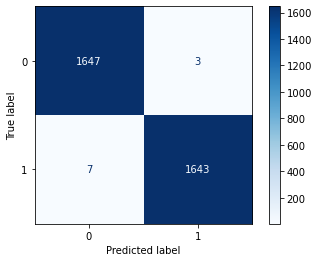

In [210]:
plot_confusion_matrix(gs_tvec, X3_test, y3_test, cmap='Blues', values_format='d');

In [300]:
precision_score(y3_test, gs_tvec.predict(X3_test))

0.9981773997569866

#### Result after Changing to TF-IDF Vectorizer

|Model|Vectorizer|Train Score|Test Score|Precision|False Positive|False Negative|
|----|----|----|----|----|----|----|
|Naive Bayes|Count|0.9973|0.9967|0.9976|4|7|
|Naive Bayes|TF-IDF|0.9969|0.9970|0.9982|3|7|

We can see that there is a slight improvement in Specificity (higher number of TN predicted). Our goal is to minimise false positive (Precision). Notice that the overfitting issue is solved after changing from Count Vectorizer to TF-IDF Vectorizer. 

## 3.3.2 Random Forest

In [228]:
pipe_rf = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = stopwords_list)),
    ('rf', RandomForestClassifier())
])

In [260]:
pipe_rf_params = {
    'tvec__max_features': [2_000, 3_000],
    'tvec__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 1, 2],
    "rf__min_samples_split": [None, 2, 4], 
    "rf__min_samples_leaf": [None, 1, 2]
}

In [261]:
gs_rf = GridSearchCV(pipe_rf,
                     param_grid = pipe_rf_params, 
                     cv=5)

In [262]:
gs_rf.fit(X3_train, y3_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
  

In [263]:
print(gs_rf.best_score_)
gs_rf.best_params_

0.9965671641791045


{'rf__max_depth': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 4,
 'rf__n_estimators': 200,
 'tvec__max_features': 2000,
 'tvec__ngram_range': (1, 1)}

In [264]:
gs_rf.score(X3_train, y3_train)

1.0

In [265]:
gs_rf.score(X3_test, y3_test)

0.9963636363636363

In [266]:
preds_rf = gs_rf.predict(X3_test)

In [267]:
confusion_matrix(y3_test, preds_rf)

array([[1644,    6],
       [   6, 1644]])

In [268]:
tn6, fp6, fn6, tp6 = confusion_matrix(y3_test, preds_rf).ravel()

In [269]:
print("True Negatives: %s" % tn6)
print("False Positives: %s" % fp6)
print("False Negatives: %s" % fn6)
print("True Positives: %s" % tp6)

True Negatives: 1644
False Positives: 6
False Negatives: 6
True Positives: 1644


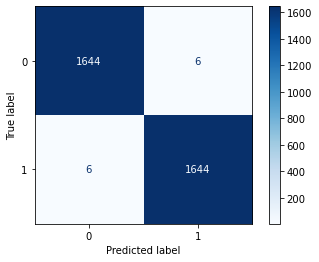

In [270]:
plot_confusion_matrix(gs_rf, X3_test, y3_test, cmap='Blues', values_format='d');

In [319]:
precision_score(y3_test, gs_rf.predict(X3_test))

0.9963636363636363

#### Random Forest Result

|Model|Vectorizer|Train Score|Test Score|Precision|False Positive|False Negative|
|----|----|----|----|----|----|----|
|Naive Bayes|Count|0.9973|0.9967|0.9976|4|7|
|Naive Bayes|TF-IDF|0.9969|0.9970|0.9982|3|7|
|Random Forest|TF-IDF|1.0|0.9964|0.9964|6|6|

We can see that it is overfitted but able to predict 1 more TP using this model. Naive Bayes with TF-IDF vectorizer 
seems to be a more balance model and it's not overfitted. It also has the lowest number of False Positive, which is our deciding factor.

# 3.4 Conclusion and Recommendation


#### Conclusion
We notice that there isn't a huge difference change from the baseline model, as it has a high test score to begin with. Despite the high baseline score, we did manage fix overfitting issue and notice slight improvement in accuracy using Naive Bayes with TF-IDF vectorizer. Testing with Random Forest Classifier did not improve test score nor accuracy.

Throughout this project we are able to address some of the issues mention in the problem statement:
- understand current consumer response/comments: number of posts made in the span of 12 days and who are the top authors
- find out if the merchandise they had planned that would have high demand are accurate based on consumers comments: notice some product names and colour in most common words analysis
- understand current competitor trend: Similarly, we notice there are product name mention in adidas common word, which can help with future season merchandise planning
- dynamic/scalable solution: able to select collect data when needed, thou date selection might be a bit tricky and will need more fine tuning in the future 
- differentiate Nike posts from competitor posts using a classification model: Precision score for Naive Bayes model with TF-IDF is 0.9981773997569866. This shows that our model can accurately classify Nike from Adidas.



#### Recommendation
- Sentiment Analysis : Should focus on improving sentiment before launching brand campaigns on r/Nike
- Utilise popular bigram/trigrams : Can be used to determine which product lines are in-demand for campaigns
- Improve generalizability of classifier: Train classifier on other online forums for more generalizable results across online demographics
